# FEATURE ENGINEERING AND SELECTION

### Importing Required Libraries

In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Reading and Understanding the data

In [2]:
data = pd.read_csv(r'C:\Users\HP\Desktop\My documents\Life_Expectancy data.csv')
data.head()

,Country,Year,Status,LifeExpectancy,Adult_Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Population,Measles,BMI,under-five deaths,Polio
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,0.1,584.259210,33736494.0,1154,19.1,83,6.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,0.1,612.696514,327582.0,492,18.6,86,58.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,0.1,631.744976,31731688.0,430,18.1,89,62.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,0.1,669.959000,3696958.0,2787,17.6,93,67.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,0.1,63.537231,2978599.0,3013,17.2,97,68.0


In [3]:
data.shape

(2938, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2938 non-null   object 
 1   Year                2938 non-null   int64  
 2   Status              2938 non-null   object 
 3   LifeExpectancy      2938 non-null   float64
 4   Adult_Mortality     2938 non-null   float64
 5   infant deaths       2938 non-null   int64  
 6   Alcohol             2938 non-null   float64
 7   HIV/AIDS            2938 non-null   float64
 8   GDP                 2938 non-null   float64
 9   Population          2938 non-null   float64
 10  Measles             2938 non-null   int64  
 11  BMI                 2938 non-null   float64
 12  under-five deaths   2938 non-null   int64  
 13  Polio               2938 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 321.5+ KB


In [5]:
data.isnull().sum()

Country               0
Year                  0
Status                0
LifeExpectancy        0
Adult_Mortality       0
infant deaths         0
Alcohol               0
HIV/AIDS              0
GDP                   0
Population            0
Measles               0
BMI                   0
under-five deaths     0
Polio                 0
dtype: int64

In [6]:
data.describe()

,Year,LifeExpectancy,Adult_Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Population,Measles,BMI,under-five deaths,Polio
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,1.742103,6611.523863,1.023085e+07,2419.592240,38.381178,42.035739,82.617767
std,4.613841,9.509115,124.086215,117.926501,3.921946,5.077785,13296.603449,5.402242e+07,11467.272489,19.935375,160.445548,23.367166
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.100000,1.681350,3.400000e+01,0.000000,1.000000,0.000000,3.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,0.100000,580.486996,4.189172e+05,0.000000,19.400000,0.000000,78.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,0.100000,1766.947595,1.386542e+06,17.000000,43.500000,4.000000,93.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,0.800000,4779.405190,4.584371e+06,360.250000,56.100000,28.000000,97.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,50.600000,119172.741800,1.293859e+09,212183.000000,87.300000,2500.000000,99.000000


### Feature Transformation

Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.


#### Dealing with Categorical  Variables

Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. In this dataset only "Country" and "Status" columns contains categorical variables.I will use `unique()` method to obtain all the categories in these columns before proceeding with further transformations


In [7]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [8]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

### Categorical Variables Transformation with 'pandas get_dummies()'

Now, to be recognized by a machine learning algorithms, the categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*, *labels Encoder*, *Pandas get_dummies*, and among others.

Here, I will be using, `get_dummies()` method to do this transformation. In the next cell, I will be transforming the 'country' variables into their numerical values

In [9]:
data1 = pd.get_dummies(data=data, columns = ['Country'])
data1 = pd.DataFrame(data1)
data1.head()

,Year,Status,LifeExpectancy,Adult_Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Population,Measles,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,Developing,65.0,263.0,62,0.01,0.1,584.259210,33736494.0,1154,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,64,0.01,0.1,612.696514,327582.0,492,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,66,0.01,0.1,631.744976,31731688.0,430,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,69,0.01,0.1,669.959000,3696958.0,2787,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,71,0.01,0.1,63.537231,2978599.0,3013,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.shape

(2938, 14)

In [11]:
data1.shape

(2938, 206)

As we can see, we went from 14 original features in our dataset to 206. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories (e.g. different countries) will produce a new column (variable) for each unique categorical value (for each unique country). It will place a one in the column corresponding to the categorical value present for that observation.


### Categorical Variables Transformation with Label Encoder

Since 'Status' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "Developing", using the `replace()` function.


In [12]:
data1.replace({"Developing":0,"Developed":1},inplace=True)
data1

,Year,Status,LifeExpectancy,Adult_Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Population,Measles,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,0,65.0,263.0,62,0.01,0.1,584.259210,33736494.0,1154,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,64,0.01,0.1,612.696514,327582.0,492,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66,0.01,0.1,631.744976,31731688.0,430,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69,0.01,0.1,669.959000,3696958.0,2787,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,71,0.01,0.1,63.537231,2978599.0,3013,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,33.6,454.366654,12777511.0,31,...,0,0,0,0,0,0,0,0,0,1
2934,2003,0,44.5,715.0,26,4.06,36.7,453.351155,12633897.0,998,...,0,0,0,0,0,0,0,0,0,1
2935,2002,0,44.8,73.0,25,4.43,39.8,57.348340,125525.0,304,...,0,0,0,0,0,0,0,0,0,1
2936,2001,0,45.3,686.0,25,1.72,42.1,548.587312,12366165.0,529,...,0,0,0,0,0,0,0,0,0,1


## Feature Selection

Here, I will be selecting only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'Life Expectancy'. According to the course. there are many methods for feature selection, and building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

In [13]:
#printing all the columns in data1
data1.columns.tolist()

['Year',
 'Status',
 'LifeExpectancy',
 'Adult_Mortality',
 'infant deaths',
 'Alcohol',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Measles',
 'BMI',
 'under-five deaths ',
 'Polio',
 'Country_Afghanistan',
 'Country_Albania',
 'Country_Algeria',
 'Country_Angola',
 'Country_Antigua and Barbuda',
 'Country_Argentina',
 'Country_Armenia',
 'Country_Australia',
 'Country_Austria',
 'Country_Azerbaijan',
 'Country_Bahamas',
 'Country_Bahrain',
 'Country_Bangladesh',
 'Country_Barbados',
 'Country_Belarus',
 'Country_Belgium',
 'Country_Belize',
 'Country_Benin',
 'Country_Bhutan',
 'Country_Bolivia (Plurinational State of)',
 'Country_Bosnia and Herzegovina',
 'Country_Botswana',
 'Country_Brazil',
 'Country_Brunei Darussalam',
 'Country_Bulgaria',
 'Country_Burkina Faso',
 'Country_Burundi',
 'Country_Cabo Verde',
 'Country_Cambodia',
 'Country_Cameroon',
 'Country_Canada',
 'Country_Central African Republic',
 'Country_Chad',
 'Country_Chile',
 'Country_China',
 'Country_Colombia',
 'Country

In [14]:
new_data = data1.loc[:,['Year','Status','LifeExpectancy','Adult_Mortality','infant deaths','Alcohol','HIV/AIDS',
        'GDP','Population','Measles','BMI','under-five deaths ','Polio']]

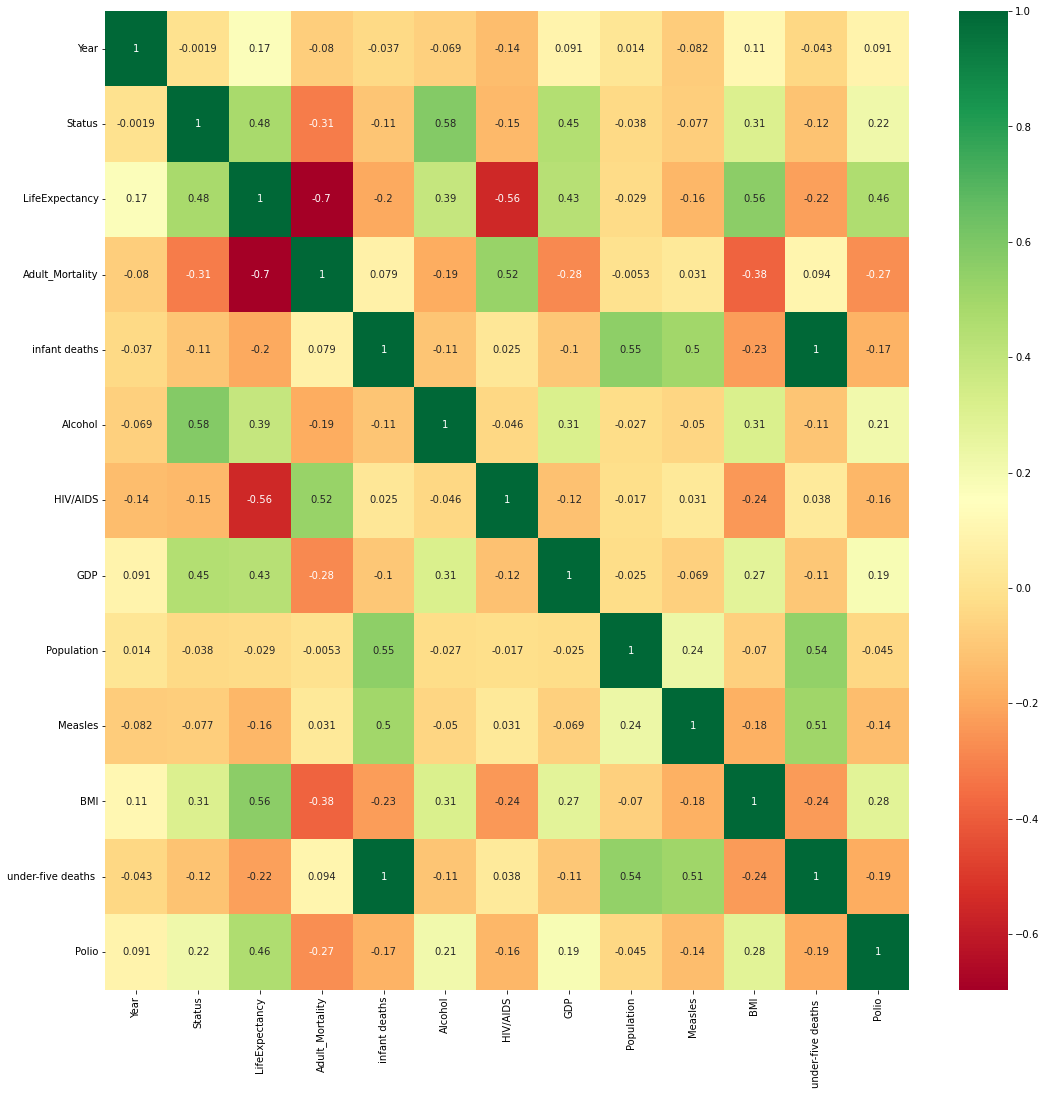

In [15]:
#constructing heatmap using seaborn
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).

Now, we can use the `corr()` function to calculate and list the correlation between all independent variables and the 'Life Expectancy'.

In [16]:
features = data1.corr()['LifeExpectancy'].sort_values()
features

Adult_Mortality        -0.696390
HIV/AIDS               -0.556703
under-five deaths      -0.222738
infant deaths          -0.196769
Country_Sierra Leone   -0.179963
                          ...   
GDP                     0.430461
Polio                   0.458399
Status                  0.481415
BMI                     0.556901
LifeExpectancy          1.000000
Name: LifeExpectancy, Length: 206, dtype: float64

## Feature Extraction using Principal Component Analysis 

### PCA with Scikit-Learn

According to the course, Dimentionality Reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

In the following portion of the lab, I will be using `scikit-learn` library to perform some PCA on the data.

In [17]:
x = data1.drop('LifeExpectancy', axis=1)

In [18]:
y = data1['LifeExpectancy']

In [19]:
scaler = StandardScaler()
x=scaler.fit_transform(x.astype(np.float64))
x

array([[ 1.6217623 , -0.45939851,  0.79211913, ..., -0.07399798,
        -0.07399798, -0.07399798],
       [ 1.40498625, -0.45939851,  0.85660141, ..., -0.07399798,
        -0.07399798, -0.07399798],
       [ 1.1882102 , -0.45939851,  0.83242056, ..., -0.07399798,
        -0.07399798, -0.07399798],
       ...,
       [-1.19632639, -0.45939851, -0.73933497, ..., -0.07399798,
        -0.07399798, 13.51388175],
       [-1.41310244, -0.45939851,  4.20161958, ..., -0.07399798,
        -0.07399798, 13.51388175],
       [-1.62987849, -0.45939851,  4.0323536 , ..., -0.07399798,
        -0.07399798, 13.51388175]])

In [20]:
#reducing the dimensionality of the dataset down to two dimensions.
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[ 2.28217919, -1.36130111],
       [ 1.69680591, -1.26872268],
       [ 1.81516893, -1.08436141],
       ...,
       [ 1.85812008, -2.93599106],
       [ 3.21288328, -4.50507   ],
       [ 3.2317695 , -4.50503841]])

### Explained Variance Ratio

According to the course, another useful piece of information in PCA is the explained variance ratio of each principal component, available via the `explained_variance_ratio_` function. The ratio indicates the proportion of the dataset's variance that lies along each principal component. Let's look at the explained variance ratio of each of our two components.


In [21]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.02033928, 0.01547936])

In [ ]:
# visualizing the result of pca and explained variance ratio
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))


plt.bar(range(7), explained_variance, alpha=0.5, align='center',
    label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout() 